# Intro

## Librerías

In [1]:
# Data
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# ML metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optimización Inversa
from scipy.optimize import differential_evolution

In [2]:
REPO_NAME = "Multi-Parameter_Wireless_Network"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/MiguelMussi/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'Multi-Parameter_Wireless_Network'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 48 (delta 22), reused 15 (delta 4), pack-reused 0
Receiving objects: 100% (48/48), 1.90 MiB | 4.42 MiB/s, done.
Resolving deltas: 100% (22/22), done.


Establecer GPU por defecto en caso de estar disponible.

In [3]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


## DataFrame

In [4]:
# Leer el archivo de texto
with open('datos.txt', 'r') as file:
    data = file.read()

# Dividir los datos por líneas y luego por espacios
lines = data.strip().split('\n')
rows = [line.split() for line in lines]

# Convertir la lista de listas en un DataFrame
df = pd.DataFrame(rows)

# # Asignar nombres a las columnas
# df.columns = ['ID', 'Value1', 'Value2', 'Value3', 'Value4', ...]

# Convertir los datos a tipos numéricos
df = df.apply(pd.to_numeric)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
0,100,5,15,25,250,7,45,25,20,11,...,20,110,25,80,3,90,12,12.42,8.52,21.36
1,100,3,105,6,260,7,90,6,20,11,...,6,25,12,30,7,45,12,18.92,6.64,21.18
2,110,-3,45,12,250,7,45,25,20,3,...,14,65,12,30,13,110,6,12.63,6.59,17.89
3,100,3,105,6,270,3,105,6,330,13,...,10,25,25,70,15,110,25,11.07,9.36,22.05
4,100,3,105,6,280,11,15,12,330,13,...,10,25,6,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,110,-5,90,6,250,7,45,25,0,7,...,8,65,25,80,5,45,6,13.07,7.71,19.45
4146,80,-5,45,6,270,3,105,6,10,7,...,12,105,6,80,3,90,12,17.19,6.84,19.59
4147,70,-1,25,25,260,11,110,6,30,-7,...,16,110,25,80,-3,65,6,17.93,5.63,19.37
4148,80,-5,45,6,260,-3,65,12,330,13,...,8,65,25,30,9,105,6,14.15,7.98,19.44


## Análisis Exploratorio

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Columns: 227 entries, 0 to 226
dtypes: float64(3), int64(224)
memory usage: 7.2 MB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,...,4150.000000,4150.000000,4150.00000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000
mean,95.648193,2.966265,58.632530,13.087470,272.997590,4.816386,63.286747,14.244096,109.893976,5.264578,...,13.649639,63.042169,15.35494,60.045783,4.952289,66.975904,13.226506,14.355853,7.330253,19.540060
std,22.668487,6.342427,36.468982,8.293967,18.055043,5.495547,33.195372,8.310667,150.141697,6.614574,...,5.407799,36.838870,8.40156,20.906726,5.586597,35.969001,7.405012,3.691391,1.486114,2.543085
min,70.000000,-7.000000,15.000000,6.000000,250.000000,-5.000000,15.000000,6.000000,0.000000,-7.000000,...,4.000000,15.000000,6.00000,30.000000,-3.000000,15.000000,6.000000,2.690000,3.030000,12.090000
25%,70.000000,-3.000000,25.000000,6.000000,260.000000,3.000000,45.000000,6.000000,0.000000,3.000000,...,10.000000,25.000000,6.00000,30.000000,-1.000000,25.000000,6.000000,11.670000,6.280000,17.732500
50%,90.000000,3.000000,45.000000,12.000000,270.000000,7.000000,65.000000,12.000000,20.000000,6.000000,...,14.000000,65.000000,12.00000,60.000000,5.000000,65.000000,12.000000,14.280000,7.210000,19.490000
75%,110.000000,7.000000,105.000000,25.000000,300.000000,11.000000,105.000000,25.000000,330.000000,11.000000,...,18.000000,105.000000,25.00000,80.000000,9.000000,105.000000,25.000000,16.790000,8.260000,21.240000
max,130.000000,13.000000,110.000000,25.000000,300.000000,13.000000,110.000000,25.000000,350.000000,13.000000,...,22.000000,110.000000,25.00000,90.000000,15.000000,110.000000,25.000000,26.700000,14.710000,29.230000


## Renombrar columnas

In [8]:
df.columns

RangeIndex(start=0, stop=227, step=1)

In [9]:
def renombrar_columnas(df):
    df.columns = [f'{i+1}' for i in range(df.shape[1])]
    return df

In [10]:
df = renombrar_columnas(df)

In [11]:
df

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,225,226,227
0,100,5,15,25,250,7,45,25,20,11,...,20,110,25,80,3,90,12,12.42,8.52,21.36
1,100,3,105,6,260,7,90,6,20,11,...,6,25,12,30,7,45,12,18.92,6.64,21.18
2,110,-3,45,12,250,7,45,25,20,3,...,14,65,12,30,13,110,6,12.63,6.59,17.89
3,100,3,105,6,270,3,105,6,330,13,...,10,25,25,70,15,110,25,11.07,9.36,22.05
4,100,3,105,6,280,11,15,12,330,13,...,10,25,6,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,110,-5,90,6,250,7,45,25,0,7,...,8,65,25,80,5,45,6,13.07,7.71,19.45
4146,80,-5,45,6,270,3,105,6,10,7,...,12,105,6,80,3,90,12,17.19,6.84,19.59
4147,70,-1,25,25,260,11,110,6,30,-7,...,16,110,25,80,-3,65,6,17.93,5.63,19.37
4148,80,-5,45,6,260,-3,65,12,330,13,...,8,65,25,30,9,105,6,14.15,7.98,19.44


In [12]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '218', '219', '220', '221', '222', '223', '224', '225', '226', '227'],
      dtype='object', length=227)

## Filas Duplicadas

In [13]:
filas_duplicadas = df.duplicated().any()
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas.") if filas_duplicadas.any() else print("No hay filas duplicadas.")

Hay 300 filas duplicadas.


In [14]:
filas_duplicadas = df[df.duplicated()]
filas_duplicadas

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,225,226,227
500,90,13,25,6,260,3,65,12,0,3,...,14,15,25,70,15,110,25,17.38,7.83,20.81
501,70,-1,25,25,280,-5,45,25,0,3,...,4,90,6,80,5,45,6,12.71,7.50,17.50
502,110,-5,90,6,300,11,105,6,20,3,...,6,25,25,60,13,25,25,14.99,5.00,15.73
503,110,-5,90,6,260,11,110,6,0,5,...,20,105,6,60,5,105,6,13.48,9.11,22.76
504,70,-1,25,25,260,7,90,6,10,7,...,6,25,12,60,13,25,25,12.06,9.15,19.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,110,-5,90,6,250,7,45,25,0,7,...,8,65,25,80,5,45,6,13.07,7.71,19.45
4146,80,-5,45,6,270,3,105,6,10,7,...,12,105,6,80,3,90,12,17.19,6.84,19.59
4147,70,-1,25,25,260,11,110,6,30,-7,...,16,110,25,80,-3,65,6,17.93,5.63,19.37
4148,80,-5,45,6,260,-3,65,12,330,13,...,8,65,25,30,9,105,6,14.15,7.98,19.44


In [15]:
def eliminar_registros_duplicados(df):
    df_clean = df.drop_duplicates()
    return df_clean

In [16]:
df = eliminar_registros_duplicados(df)

In [17]:
df.shape

(3850, 227)

## Train / Test

In [18]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [19]:
df_train.shape, df_test.shape

((3080, 227), (770, 227))

## Normalización

In [20]:
def escalar_datos(df, scaler_dict=None):
    # Si no se proporciona un diccionario de scalers, inicializar uno
    if scaler_dict is None:
        scaler_dict = {}

    # Iterar sobre cada columna en el DataFrame
    for columna in df.columns:
        # Inicializar un scaler para cada columna si no está en el diccionario
        if columna not in scaler_dict:
            scaler_dict[columna] = MinMaxScaler()
        # Escalar la columna y reemplazar los valores en el DataFrame
        df[columna] = scaler_dict[columna].fit_transform(df[[columna]])

    # Devolver el DataFrame escalado y el diccionario de scalers
    return df, scaler_dict

In [21]:
df_train, train_scaler_dict = escalar_datos(df_train)

In [22]:
df_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,225,226,227
count,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,...,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000
mean,0.429383,0.500292,0.456613,0.373667,0.459221,0.541089,0.506288,0.434398,0.304536,0.614481,...,0.534199,0.502409,0.492584,0.498268,0.439755,0.548377,0.379118,0.474150,0.334138,0.436364
std,0.378003,0.317780,0.384661,0.437069,0.360829,0.306982,0.347463,0.438444,0.424869,0.329296,...,0.300122,0.388055,0.441201,0.351123,0.307880,0.378722,0.389276,0.156230,0.135512,0.148748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.105263,0.000000,0.200000,0.444444,0.315789,0.000000,0.000000,0.500000,...,0.222222,0.105263,0.000000,0.000000,0.222222,0.105263,0.000000,0.359608,0.236890,0.330222
50%,0.333333,0.500000,0.315789,0.315789,0.400000,0.666667,0.526316,0.315789,0.057143,0.600000,...,0.555556,0.526316,0.315789,0.500000,0.444444,0.526316,0.315789,0.471666,0.321881,0.436406
75%,0.666667,0.900000,0.947368,1.000000,0.700000,0.666667,0.828947,1.000000,0.942857,0.900000,...,0.777778,0.947368,1.000000,0.833333,0.666667,0.947368,1.000000,0.576481,0.418626,0.534422
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Variables objetivo

In [23]:
def separar_Xy(df, columnas_target):
# def separar_Xy(df, cant_var_target):
    # POR NOMBRE
    X = df.drop(columnas_target, axis=1).copy()
    y = df[columnas_target].copy()

    # POR CANTIDAD
    # y = df.iloc[:, -cant_var_target:].copy()
    # X = df.iloc[:, :-cant_var_target].copy()

    return X, y

In [26]:
columnas_target = ['225', '226', '227']
# cant_var_target = 3

In [27]:
X_train, y_train = separar_Xy(df_train, columnas_target=columnas_target)
# X_train, y_train = separar_Xy(df_train, cant_var_target)

## Visualizaciones

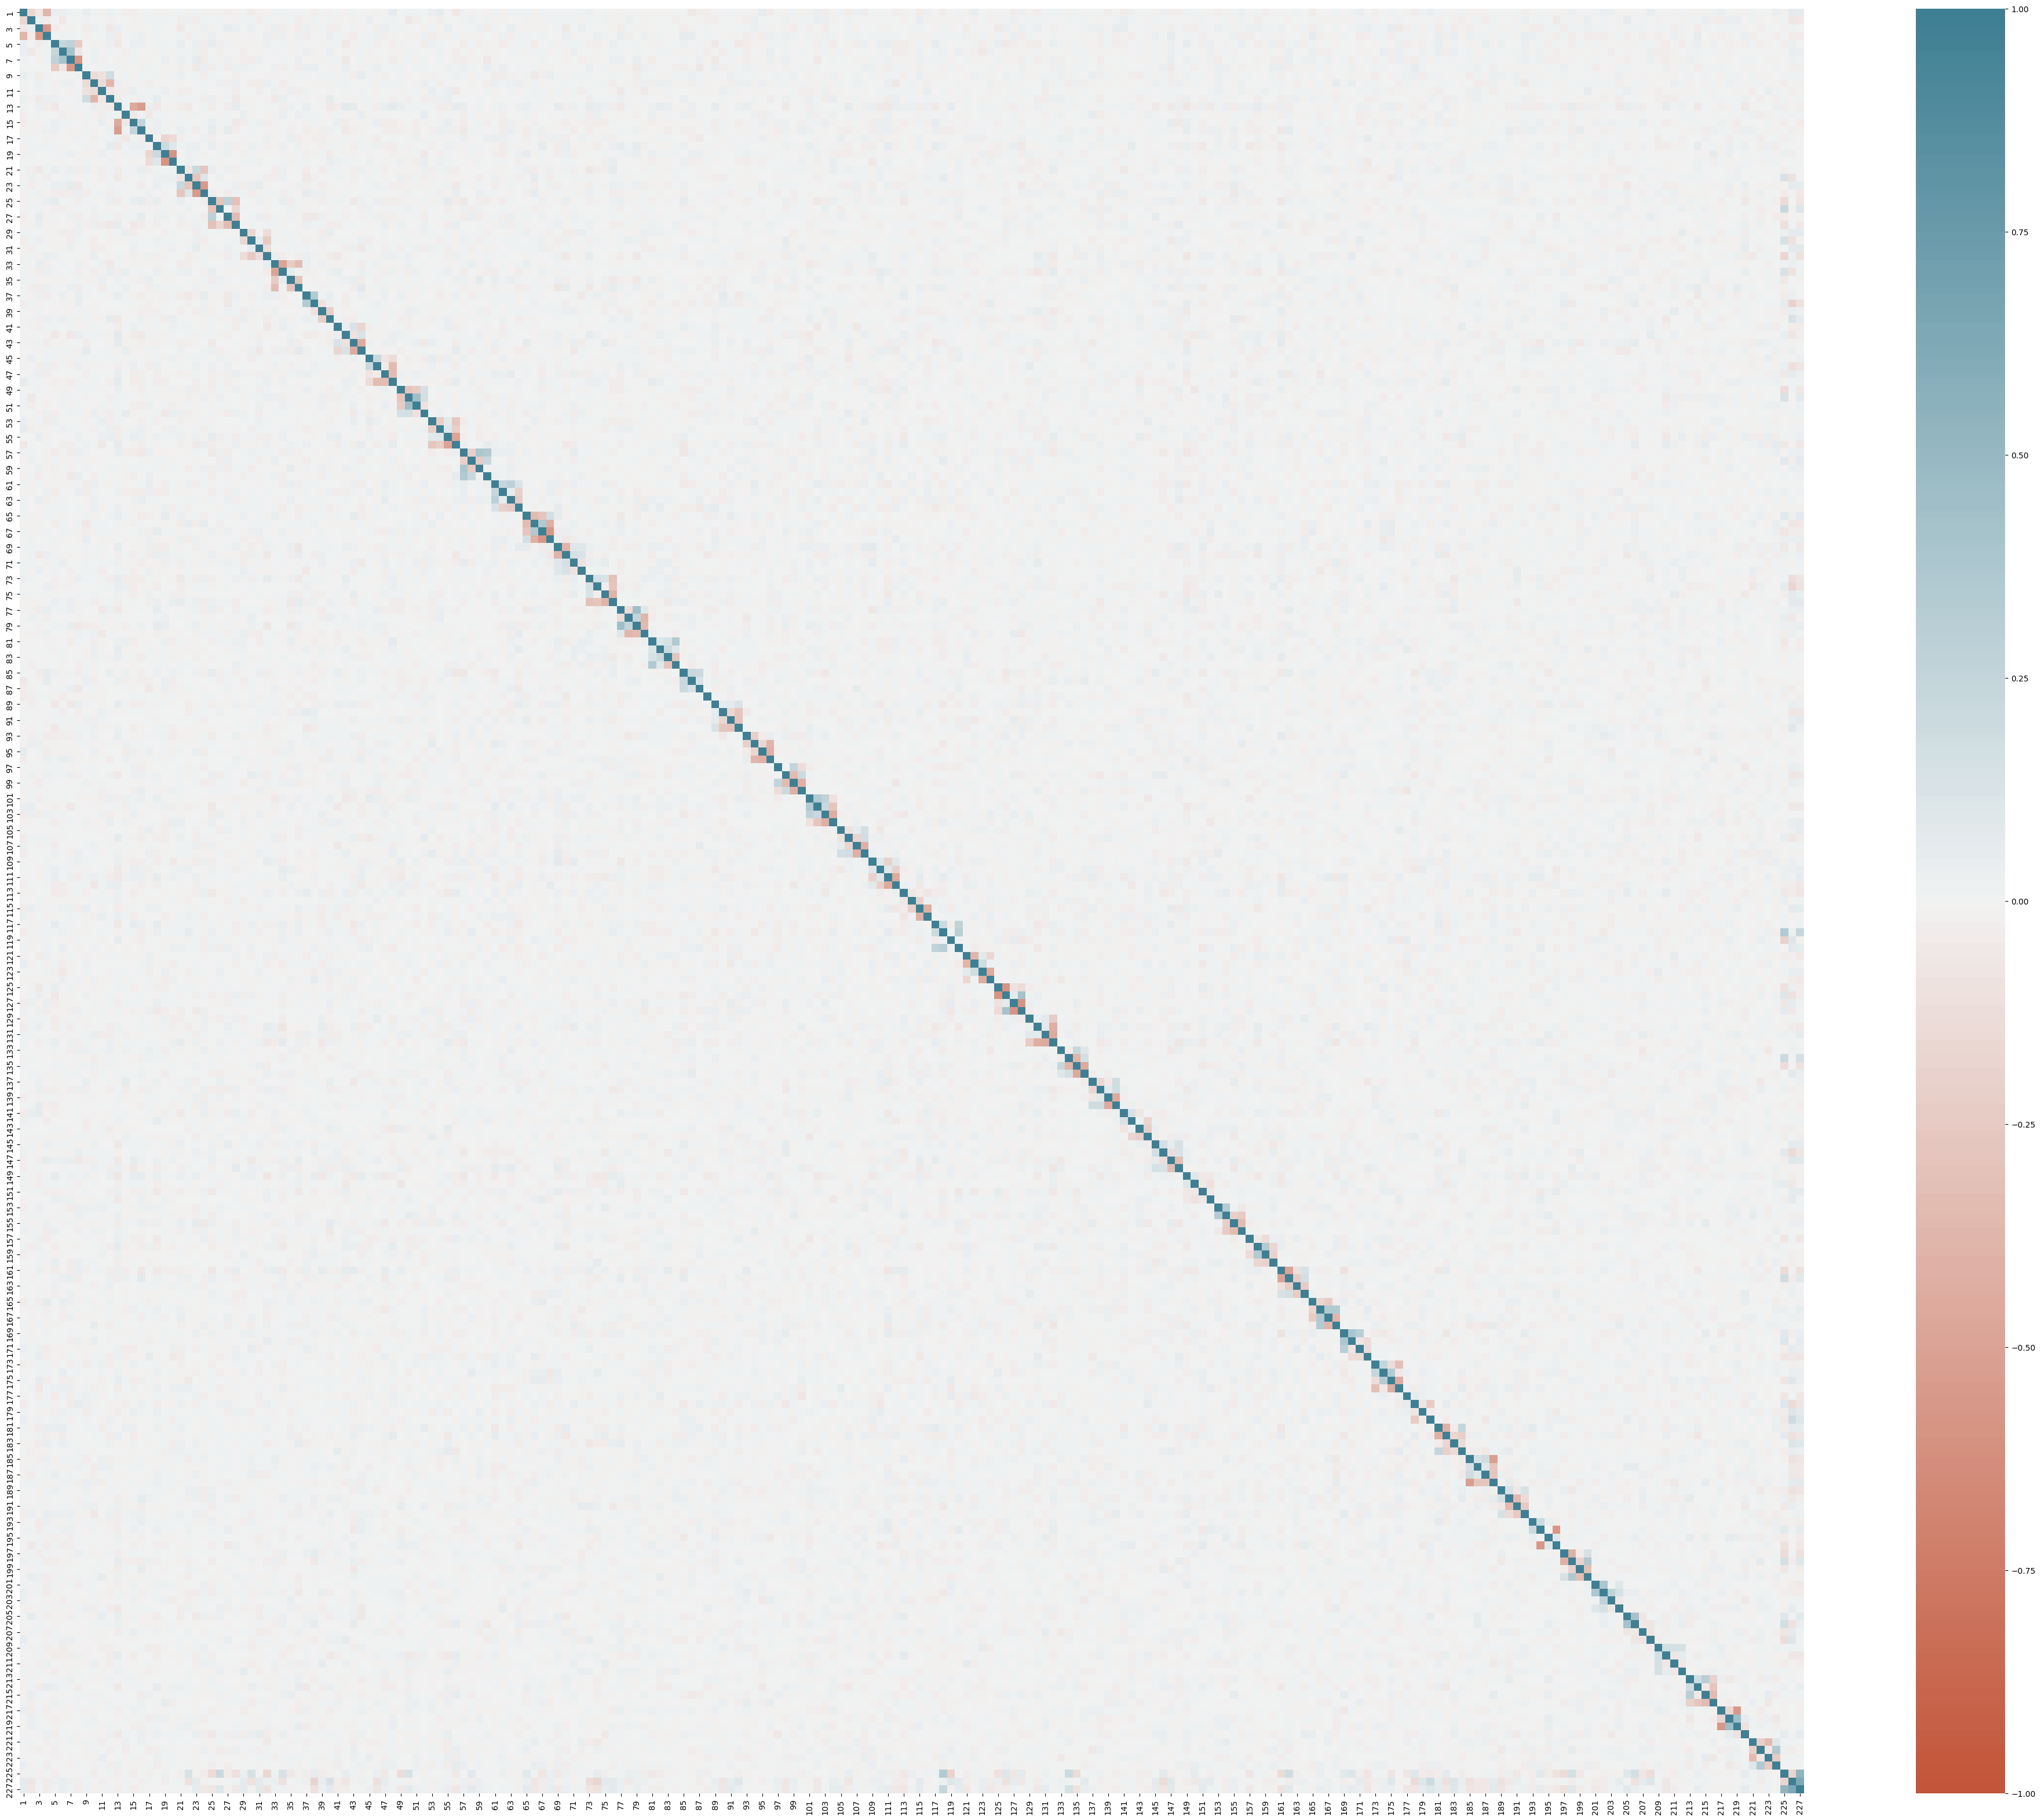

In [28]:
corr = df_train.corr()

plt.figure(figsize=(50, 40))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True,
    annot = False,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

# NN

## Test

In [29]:
df_test_out = df_test.copy()
df_test_out = renombrar_columnas(df_test_out)
df_test_out = eliminar_registros_duplicados(df_test_out)
df_test_out, _ = escalar_datos(df_test_out, train_scaler_dict)

In [30]:
X_test, y_test = separar_Xy(df_test_out, columnas_target=columnas_target)
# X_test, y_test = separar_Xy(df_test_out, cant_var_target)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3080, 224), (3080, 3), (770, 224), (770, 3))

## Modelo

In [32]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(128, activation='relu'), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               57600     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [34]:
# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=20,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

# Definir el número de características (p) para calcular R2 ajustado
p = X_train.shape[1]

history = model.fit(X_train, y_train, epochs=500, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)
print("-------------------------\nFin del Entrenamiento")

Inicio del Entrenamiento
-------------------------
Epoch 1/500
39/39 [==============================] - 6s 11ms/step - loss: 0.0808 - mean_squared_error: 0.0808 - mae: 0.2196 - val_loss: 0.0415 - val_mean_squared_error: 0.0415 - val_mae: 0.1618 - lr: 0.0010
Epoch 2/500
39/39 [==============================] - 0s 7ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - mae: 0.1622 - val_loss: 0.0341 - val_mean_squared_error: 0.0341 - val_mae: 0.1451 - lr: 0.0010
Epoch 3/500
39/39 [==============================] - 0s 6ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - mae: 0.1476 - val_loss: 0.0293 - val_mean_squared_error: 0.0293 - val_mae: 0.1336 - lr: 0.0010
Epoch 4/500
39/39 [==============================] - 0s 7ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - mae: 0.1353 - val_loss: 0.0287 - val_mean_squared_error: 0.0287 - val_mae: 0.1324 - lr: 0.0010
Epoch 5/500
39/39 [==============================] - 0s 6ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - mae: 0.1320 -

In [35]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

25/25 [==============================] - 0s 3ms/step


In [36]:
y_pred

array([[0.36895528, 0.4316135 , 0.45292354],
       [0.39682811, 0.45093012, 0.48578617],
       [0.4856919 , 0.24132407, 0.34971946],
       ...,
       [0.49191788, 0.45797616, 0.5562367 ],
       [0.4435283 , 0.300119  , 0.3815565 ],
       [0.45910072, 0.35548684, 0.44124213]], dtype=float32)

## Métricas

In [37]:
def r2_ajustado(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    r2_aj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return r2_aj

Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.11
R2 Score: 0.19
R2 Ajustado: -0.15



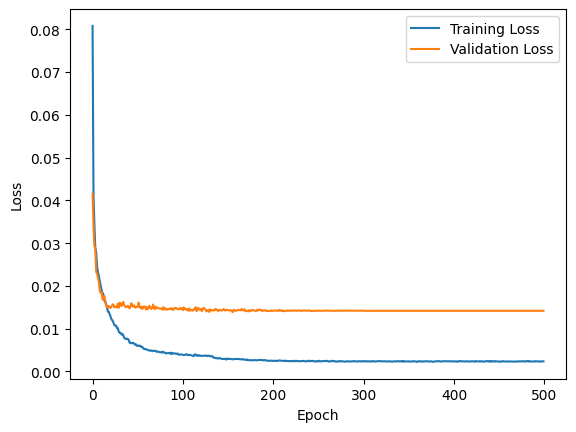

In [38]:
# Calcular R2 ajustado
n = len(y_test)
r2_aj = r2_ajustado(y_test, y_pred, n, p)

# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R2 Score: {:.2f}".format(r2))
print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predicciones

In [39]:
df_test

,1,2,3,4,5,6,7,8,9,10,...,218,219,220,221,222,223,224,225,226,227
3306,80,-5,110,6,250,3,65,25,0,5,...,20,105,6,80,1,15,12,10.69,9.93,22.17
597,130,3,110,6,280,-5,25,6,0,3,...,6,45,6,80,3,90,12,12.14,10.15,21.95
1416,80,-5,45,6,280,-5,45,25,330,-5,...,6,25,12,30,13,110,6,8.75,5.96,14.89
946,130,11,105,6,260,-3,65,12,330,13,...,4,90,6,30,7,45,12,18.51,5.33,18.58
2512,90,5,45,12,280,11,15,12,350,-5,...,20,105,6,70,-1,65,12,16.54,5.65,16.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,110,-5,90,6,260,-5,45,6,330,13,...,22,65,12,70,5,15,25,15.59,8.09,22.46
3238,110,-5,90,6,260,3,65,12,10,7,...,20,110,25,60,13,25,25,17.23,6.05,19.70
4002,100,5,15,25,260,3,65,12,350,13,...,20,110,25,30,13,110,6,12.92,7.01,16.46
3781,120,11,25,6,270,3,105,6,0,3,...,20,105,6,80,1,15,12,17.00,6.30,19.13


In [41]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['225', '226', '227']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,221,222,223,224,225,226,227,P_225,P_226,P_227
3306,80,-5,110,6,250,3,65,25,0,5,...,80,1,15,12,10.69,9.93,22.17,11.065285,7.389297,19.461256
597,130,3,110,6,280,-5,25,6,0,3,...,80,3,90,12,12.14,10.15,21.95,11.697998,7.584394,19.969971
1416,80,-5,45,6,280,-5,45,25,330,-5,...,30,13,110,6,8.75,5.96,14.89,13.715206,5.467373,17.863657
946,130,11,105,6,260,-3,65,12,330,13,...,30,7,45,12,18.51,5.33,18.58,18.636120,6.132088,21.448805
2512,90,5,45,12,280,11,15,12,350,-5,...,70,-1,65,12,16.54,5.65,16.74,15.720095,5.869042,19.533978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,110,-5,90,6,260,-5,45,6,330,13,...,70,5,15,25,15.59,8.09,22.46,12.275513,5.950388,17.977522
3238,110,-5,90,6,260,3,65,12,10,7,...,60,13,25,25,17.23,6.05,19.70,16.434891,4.926459,18.341900
4002,100,5,15,25,260,3,65,12,350,13,...,30,13,110,6,12.92,7.01,16.46,13.856537,7.655560,21.060543
3781,120,11,25,6,270,3,105,6,0,3,...,80,1,15,12,17.00,6.30,19.13,12.758092,6.061202,18.356495


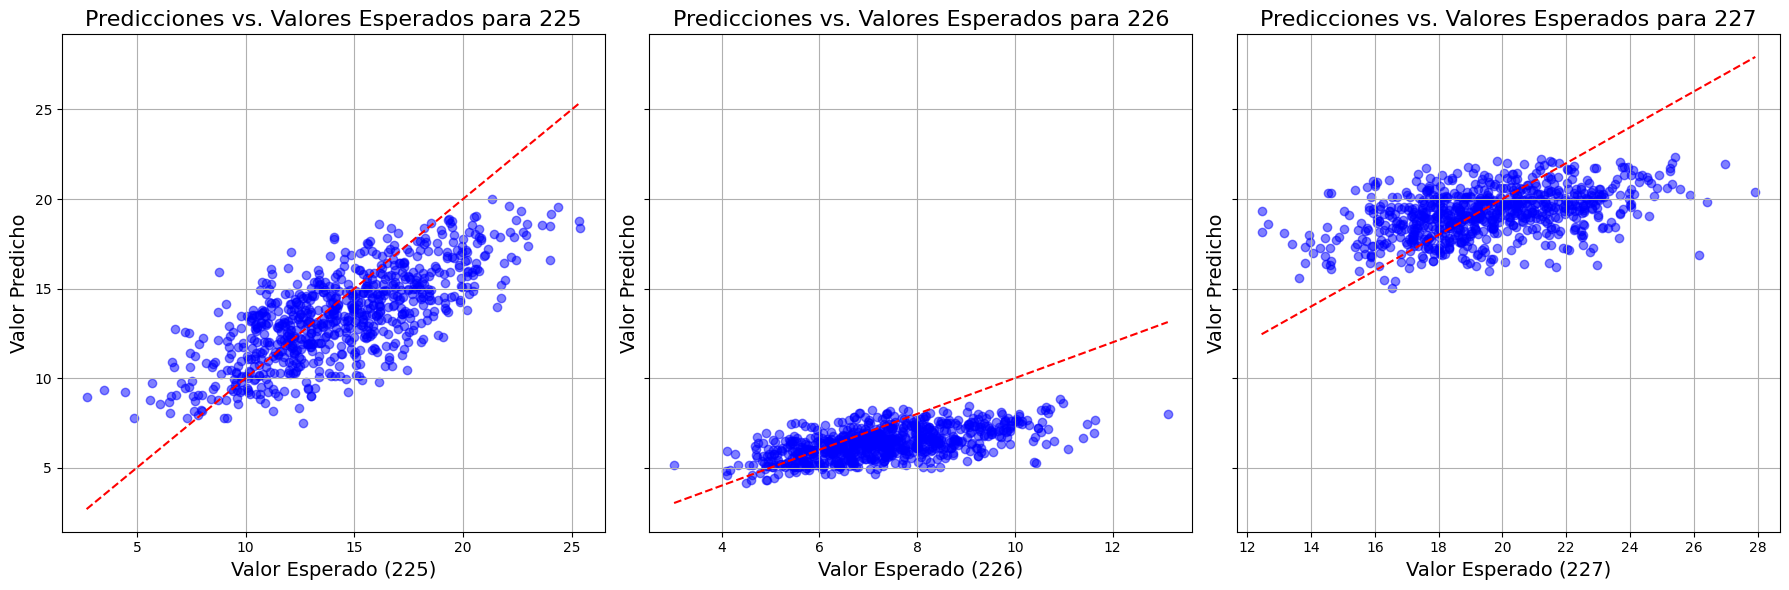

In [43]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['225', '226', '227']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Optimización Inversa

In [45]:
# Función objetivo para la optimización inversa
def funcion_objetivo(inputs):
    # Reescalar las entradas a sus valores originales
    inputs_rescaled = train_scaler_dict['225'].inverse_transform(inputs.reshape(1, -1))

    # Hacer predicciones con el modelo
    y_pred = model.predict(inputs_rescaled)

    # Calcular la suma de las salidas de las variables 225, 226 y 227
    suma_salidas = np.sum(y_pred[:, [0, 1, 2]])

    # Devolver el negativo de la suma para que minimice la función objetivo
    return -suma_salidas

# Definir límites para las entradas a las 224 características
limites_entradas = [(0, 1)] * 224  # Suponemos que las entradas están normalizadas entre 0 y 1

# Realizar la optimización utilizando algoritmo genético (differential evolution)
resultado_optimizacion = differential_evolution(funcion_objetivo, bounds=limites_entradas, strategy='best1bin', maxiter=5, popsize=10)

# Las entradas óptimas que maximizan la función objetivo
entradas_optimas = resultado_optimizacion.x

# Imprimir las entradas óptimas
print("Entradas óptimas:")
print(entradas_optimas)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
1/1 [==============================] - 0s 28ms/step
Entradas óptimas:
[0.52449979 0.33772492 0.50815152 0.2215722  0.92174798 0.19873471
 0.05690585 0.11448514 0.20685752 0.01920565 0.87377896 0.06012395
 0.71422703 0.3992615  0.00922588 0.67647463 0.17786569 0.22782305
 0.97538335 0.78782594 0.18850402 0.78145292 0.00407121 0.20741353
 0.02405476 0.31962992 0.27850952 0.73008642 0.93525057 0.32303722
 0.92539523 0.24487673 0.76428519 0.75617208 0.08994161 0.09645166
 0.84857261 0.11528808 0.43685108 0.83329414 0.93967804 0.43270792
 0.19846564 0.54056435 0.70957447 0.36284472 0.50901307 0.46005592
 0.16833399 0.24983984 0.5548747  0.02310493 0.31755188 0.40379616
 0.01354938 0.1809766  0.71113933 0.23671044 0.89727675 0.30214096
 0.777686   0.26429777 0.25292484 0.2951924  0.43087239 0.84658891
 0.06012309 0.44250772 0.4891263  0.45127731 0.44951791 0.81574709
 0.09801412 0.00302613 0.01058154 0.05525888 0.27069275 0.4

In [46]:
# Reescalar las entradas óptimas a su forma original
entradas_optimas_rescaled = train_scaler_dict['225'].inverse_transform(entradas_optimas.reshape(1, -1))

# Imprimir las entradas óptimas reescaladas
print("Entradas óptimas reescaladas:")
print(entradas_optimas_rescaled)

Entradas óptimas reescaladas:
[[14.59614529 10.35635559 14.2250395   7.71968901 23.61367907  7.201278
   3.98176282  5.28881276  7.38566572  3.12596828 22.5247825   4.05481364
  18.90295354 11.75323599  2.89942754 18.04597404  6.7275512   7.86158315
  24.83120199 20.57364886  6.96904135 20.4289814   2.78241654  7.39828716
   3.23604311  9.94559913  9.01216606 19.26296182 23.92018799 10.02294486
  23.69647178  8.24870176 20.03927379 19.85510623  4.73167458  4.87945265
  21.95259817  5.30703948 12.60651948 21.60577705 24.02069152 12.51246988
   7.19517012 14.96081082 18.79734042 10.92657518 14.24459662 13.13326942
   6.51118167  8.36136431 15.28565561  3.21448194  9.89842765 11.85617293
   2.99757084  6.79816881 18.8328627   8.06332706 23.05818222  9.54859973
  20.3434723   8.68955947  8.43139381  9.39086757 12.4708033  21.90756816
   4.05479407 12.73492532 13.79316696 12.93399502 12.89405665 21.20745893
   4.91492058  2.7586932   2.93020103  3.94437654  8.83472545 12.64216411
   7.78836